CNN for static classification

In [5]:
import numpy as np
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import matplotlib.pyplot as plt


# Path to your training and validation datasets
train_data_dir = 'E:\Projects\Sign Language Project\ASL/train_reduced10'
val_data_dir = 'E:\Projects\Sign Language Project\ASL/train_reduced10'

# Use ImageDataGenerator for loading and augmenting the data
train_datagen = ImageDataGenerator(rescale=1./255)
val_datagen = ImageDataGenerator(rescale=1./255)

# Create generators for training and validation sets
train_generator = train_datagen.flow_from_directory(
    train_data_dir,
    target_size=(300, 300),
    color_mode='grayscale',  # Since we're working with grayscale images
    batch_size=32,
    class_mode='categorical'  # Assuming multiple classes (signs/gestures)
)

val_generator = val_datagen.flow_from_directory(
    val_data_dir,
    target_size=(300, 300),
    color_mode='grayscale',
    batch_size=32,
    class_mode='categorical'
)

num_classes = len(train_generator.class_indices)

Found 290 images belonging to 29 classes.
Found 290 images belonging to 29 classes.


In [6]:

import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout, BatchNormalization

# Define input shape based on 300x300 grayscale images (1 channel)
input_shape = (300, 300, 1)

# Create CNN model
model = Sequential([
    # Convolutional layers with MaxPooling and BatchNormalization
    Conv2D(32, (3, 3), activation='relu', input_shape=input_shape),
    MaxPooling2D(pool_size=(2, 2)),
    BatchNormalization(),

    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D(pool_size=(2, 2)),
    BatchNormalization(),

    Conv2D(128, (3, 3), activation='relu'),
    MaxPooling2D(pool_size=(2, 2)),
    BatchNormalization(),

    # Flatten the output from Conv layers
    Flatten(),

    # Fully connected layer
    Dense(128, activation='relu'),
    Dropout(0.5),

    # Output layer with softmax for classification
    Dense(num_classes, activation='softmax')
])

# Compile the model
model.compile(optimizer='adam', loss='categorical_crossentropy',
              metrics=['accuracy'])

# Summary of the model
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_3 (Conv2D)           (None, 298, 298, 32)      320       
                                                                 
 max_pooling2d_3 (MaxPoolin  (None, 149, 149, 32)      0         
 g2D)                                                            
                                                                 
 batch_normalization_3 (Bat  (None, 149, 149, 32)      128       
 chNormalization)                                                
                                                                 
 conv2d_4 (Conv2D)           (None, 147, 147, 64)      18496     
                                                                 
 max_pooling2d_4 (MaxPoolin  (None, 73, 73, 64)        0         
 g2D)                                                            
                                                      

Model training

In [7]:
# Train the model with training data, and validate with validation data
history = model.fit(
    train_generator,
    steps_per_epoch=train_generator.samples // train_generator.batch_size,
    validation_data=val_generator,
    validation_steps=val_generator.samples // val_generator.batch_size,
    epochs=20  # Adjust based on performance
)

Epoch 1/20
9/9 [==============================] - 32s 3s/step - loss: 40.2720 - accuracy: 0.0426 - val_loss: 3.4513 - val_accuracy: 0.0486
Epoch 2/20
9/9 [==============================] - 30s 3s/step - loss: 11.9076 - accuracy: 0.0891 - val_loss: 3.9964 - val_accuracy: 0.0382
Epoch 3/20
9/9 [==============================] - 31s 3s/step - loss: 4.6288 - accuracy: 0.0620 - val_loss: 4.7865 - val_accuracy: 0.0278
Epoch 4/20
9/9 [==============================] - 23s 3s/step - loss: 3.6101 - accuracy: 0.0504 - val_loss: 5.8119 - val_accuracy: 0.0278
Epoch 5/20
9/9 [==============================] - 22s 3s/step - loss: 3.4128 - accuracy: 0.0504 - val_loss: 6.6526 - val_accuracy: 0.0312
Epoch 6/20
9/9 [==============================] - 24s 3s/step - loss: 3.3977 - accuracy: 0.0388 - val_loss: 7.4949 - val_accuracy: 0.0312
Epoch 7/20
9/9 [==============================] - 25s 3s/step - loss: 3.5630 - accuracy: 0.0698 - val_loss: 7.3093 - val_accuracy: 0.0312
Epoch 8/20
9/9 [================

Evaluation

In [8]:
# # Evaluate the model on test data
# test_generator = val_datagen.flow_from_directory(
#     'test_images',
#     target_size=(300, 300),
#     color_mode='grayscale',
#     batch_size=32,
#     class_mode='categorical'
# )

model.save('sign_language_model.h5')

# # Evaluate the model
# test_loss, test_acc = model.evaluate(test_generator)
# print(f"Test Accuracy: {test_acc}")

C:\Users\Aditya\AppData\Roaming\Python\Python311\site-packages\keras\src\engine\training.py:3000: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


CNN-LSTM for Gesture Sequences

In [9]:
# from tensorflow.keras.layers import TimeDistributed, LSTM

# # Sequential model with CNN + LSTM layers for gesture sequence recognition
# model = Sequential([
#     # TimeDistributed CNN layers
#     TimeDistributed(Conv2D(32, (3, 3), activation='relu'),
#                     input_shape=(sequence_length, 300, 300, 1)),
#     TimeDistributed(MaxPooling2D(pool_size=(2, 2))),
#     TimeDistributed(Flatten()),

#     # LSTM layer
#     LSTM(128, return_sequences=False),

#     # Fully connected layer
#     Dense(128, activation='relu'),

#     # Output layer for classification
#     Dense(num_classes, activation='softmax')
# ])

# model.compile(optimizer='adam', loss='categorical_crossentropy',
#               metrics=['accuracy'])

# model.summary()

# # Save the model
# # model.save('sign_language_model.h5')

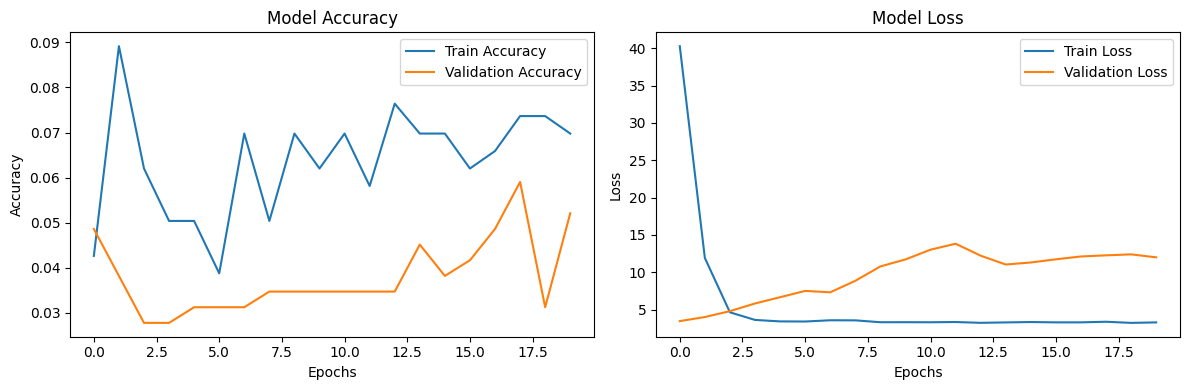

In [10]:
# Plotting accuracy and loss
plt.figure(figsize=(12, 4))

# Plot accuracy
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Model Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

# Plot loss
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Model Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.tight_layout()
plt.show()